In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing required library modules

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset
There were two datasets avalaible. We'll just get an idea about basic info of each dataset and further proceed with one of them.

In [5]:
train = pd.read_csv("/content/drive/MyDrive/Asteroid_Updated.csv")
t_train = pd.read_csv("/content/drive/MyDrive/Asteroid.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,14,15,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
t_train.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [7]:
train.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [8]:
train['diameter']

0           939.4
1             545
2         246.596
3           525.4
4         106.699
           ...   
839709        NaN
839710        NaN
839711        NaN
839712        NaN
839713        NaN
Name: diameter, Length: 839714, dtype: object

It's important to understand what values we are analysing to predict the diameter of system. The table below shows the column values name that we are using in our dataset.

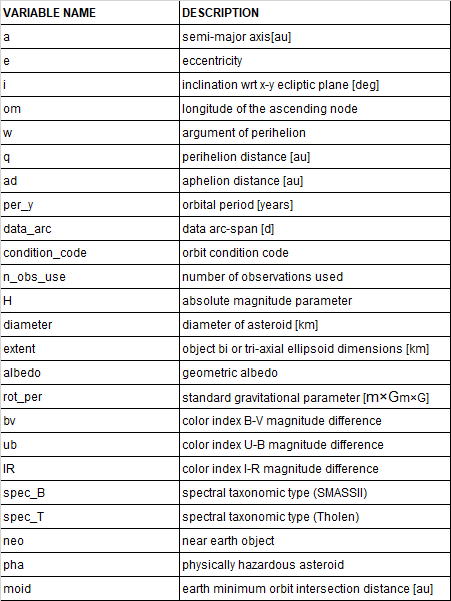

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [10]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

We choose the Asteroid_updated dataset because it has more no of numeric columns that we could use to train our data.

# Cleaning the dataset

In this section we will try to clean our existing data set to make it fit for training our model and perform EDA. We will be dropping unuseful column, replace missing vales and organise our data better.

In [11]:
## Finding missing values in terms of percentage to get a better idea
100 * train.isnull().mean()

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
pha                1.958048
diameter          83.609181
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

Based on the observation of missing values, we could drop columns with more than 80% missing values except for the diameter column. We can also note a significant number of diameter missing values. We won't be able to use these missing values to train our data so we drop those those columns.

In [12]:
drop_col = ['H','albedo','name','rot_per','spec_B',
             'BV','spec_T','UB','G',
             'extent','GM','IR']
train.drop(drop_col, axis=1, inplace=True)

#There were originally 31 columns, test that there are only 19.
len(train.columns)

19

As we have not been given test data separately, we will use the rows with null diameter values as our test data.

In [13]:
test = train[train['diameter'].isna()]

In [14]:
train = train.dropna(axis=0, subset=['diameter'])

In [15]:
## Finding length of of remaining rows after removing null diameter
len(train.index)

137636

### Object to float/numeric conversion¶

In [16]:
# converting diameter from object to float value
train['diameter'] = train.diameter.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   ad              137636 non-null  float64
 7   per_y           137636 non-null  float64
 8   data_arc        137498 non-null  float64
 9   condition_code  137636 non-null  object 
 10  n_obs_used      137636 non-null  int64  
 11  neo             137636 non-null  object 
 12  pha             137636 non-null  object 
 13  diameter        137636 non-null  float64
 14  moid            137636 non-null  float64
 15  class           137636 non-null  object 
 16  n               137636 non-null  float64
 17  per       

We would want to convert class, neo, pha, condition_code columns values to numeric form. For that we first get an idea of the unique string/character values stored in these columns and represent them with integer values.

In [18]:
train.neo.unique()

array(['N', 'Y'], dtype=object)

In [19]:
train['neo'].value_counts()

N    136786
Y       850
Name: neo, dtype: int64

In [20]:
train['pha'].value_counts()

N    137415
Y       221
Name: pha, dtype: int64

In [21]:
train['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [22]:
train['condition_code'].value_counts()

0      126194
9        5643
0        2019
9.0       863
1         808
1         565
2         302
5         241
6         152
4         143
3         135
7         129
2          94
5.0        92
7.0        78
8          49
6.0        36
4.0        33
3          32
8.0        28
Name: condition_code, dtype: int64

It can be observed for the condition_code column that the unique values we get after using value_counts are reapeated too(like 5.0 and 5 are mentioned separately) so we use "pd.to_numeric" to convert it in one form only.This could be due to inconsistency in the dataset. Like there could be integers, floats, and strings values. We created a consistent column below.

In [23]:
train.condition_code = pd.to_numeric(train.condition_code, errors='coerce')

### Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
cols = ['neo', 'pha','class']
le = LabelEncoder()

for col in cols:
    train[col] = le.fit_transform(train[col])
    
train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,neo,pha,diameter,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,0,0,939.400,1.59478,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,0,0,545.000,1.23324,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,0,0,246.596,1.03454,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,0,0,525.400,1.13948,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0.0,2916,0,0,106.699,1.09589,6,0.238632,1508.600458,282.366289


## Missing values filling

In [25]:
train.isnull().sum()

a                   0
e                   0
i                   0
om                  0
w                   0
q                   0
ad                  0
per_y               0
data_arc          138
condition_code      0
n_obs_used          0
neo                 0
pha                 0
diameter            0
moid                0
class               0
n                   0
per                 0
ma                  0
dtype: int64

We can see some missing values in data_arc, so we try to fill in those values after observing our data.

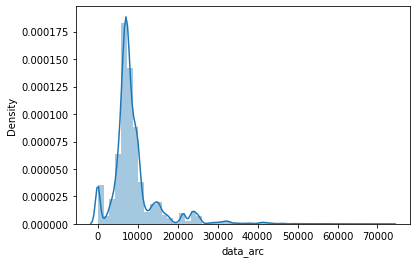

In [26]:
sns.distplot(train['data_arc'])

So data_arc has a skewed plot. It is positively skewed so we can't use mean values to replace existing values. Hence we go for median.

In [27]:
train['data_arc']

0          8822.0
1         72318.0
2         72684.0
3         24288.0
4         63507.0
           ...   
797860     2373.0
798077     3297.0
798189     2839.0
799752     2208.0
810375     3458.0
Name: data_arc, Length: 137636, dtype: float64

In [28]:
train['data_arc'] = train['data_arc'].fillna(train['data_arc'].median())

# Exploratory Data Analysis

In this section, we visualise our data by plotting various graphs and relate values present in the given columns with the diameter.

In [29]:
## diameter describing - doubt-why not giving min, max values
train['diameter'].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

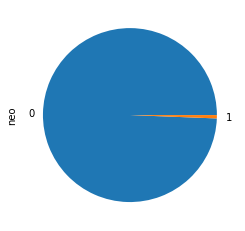

In [30]:
#calculate the percentage of neo.
train.neo.value_counts(normalize=True)

#plot the pie chart for better understanding
train.neo.value_counts(normalize=True).plot.pie()
plt.show()

We can observe that for neo as well as pha, N value comprises of a major portion which is more than 90% for both cases. 
This observation depicts that the number of near earth asteroids are very less, and hazardous object are even lesser.

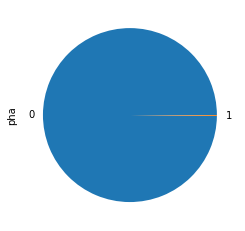

In [31]:
#calculate the percentage of pha.
train.pha.value_counts(normalize=True)

#plot the pie chart for better understanding
train.pha.value_counts(normalize=True).plot.pie()
plt.show()

Whether an asteroid is near earth or hazardous has no role in determining the diameter of the asteroid. So we drop these columns for our prediction.

In [32]:
drop_col = ['neo', 'pha']
train.drop(drop_col, axis=1, inplace=True)

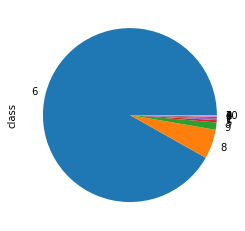

In [33]:
train['class'].value_counts(normalize=True)

#plot the pie chart for better understanding
train['class'].value_counts(normalize=True).plot.pie()
plt.show()

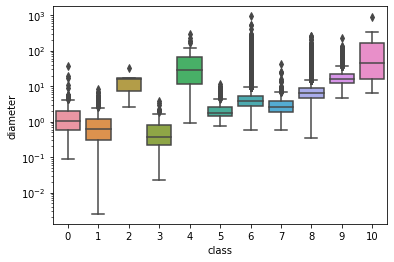

In [34]:
sns.boxplot(x='class', y='diameter', data=train)
plt.yscale('log');

We used the box plot here to get the median values of diameters wrt class. Y has been taken on a log scale as the result obtained without it weren't very clear to observe.

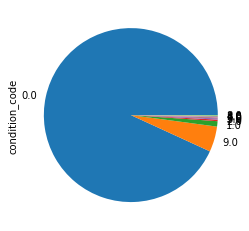

In [35]:
train['condition_code'].value_counts(normalize=True)

#plot the pie chart for better understanding
train['condition_code'].value_counts(normalize=True).plot.pie()
plt.show()

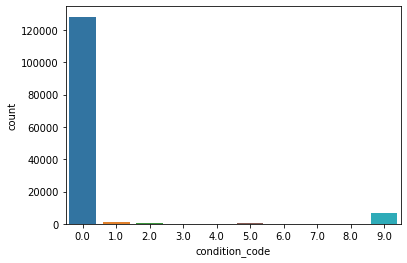

In [36]:
# count plot to get an idea of count values according to condition code
sns.countplot(train['condition_code'])

The condition_code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.

I have used scatter plot for identifying reltaionship of various aspects with columns as it is easy to observe any outliers, if present.

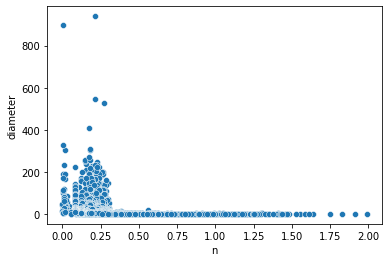

In [37]:
sns.scatterplot(train["n"],train["diameter"])

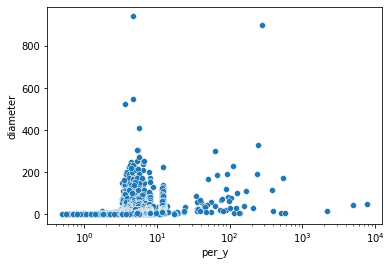

In [38]:
sns.scatterplot(train["per_y"],train["diameter"])

plt.xscale('log');

Figure shows relation of orbital period with diameter.

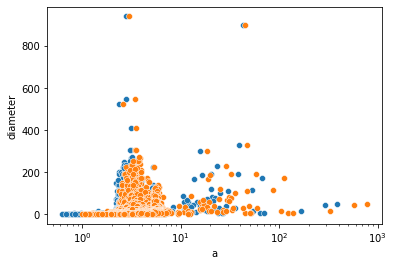

In [39]:
col = ["a","ad"]
for j in col: 
  sns.scatterplot(train[j],train["diameter"])
  plt.xscale('log');

We can observe that a, ad almost have the same plot and can see some overlapping. 

*Tried plotting two graphs, how to plot separate graph in loop?

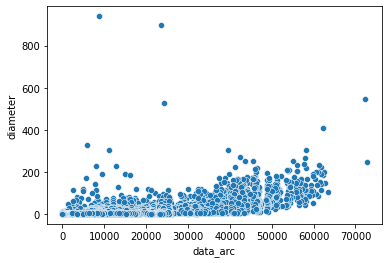

In [40]:
sns.scatterplot(train["data_arc"],train["diameter"])
#plt.xscale('log');

Above graph shows that data_arc values spread through the entire range of diameter and has a realation with it.

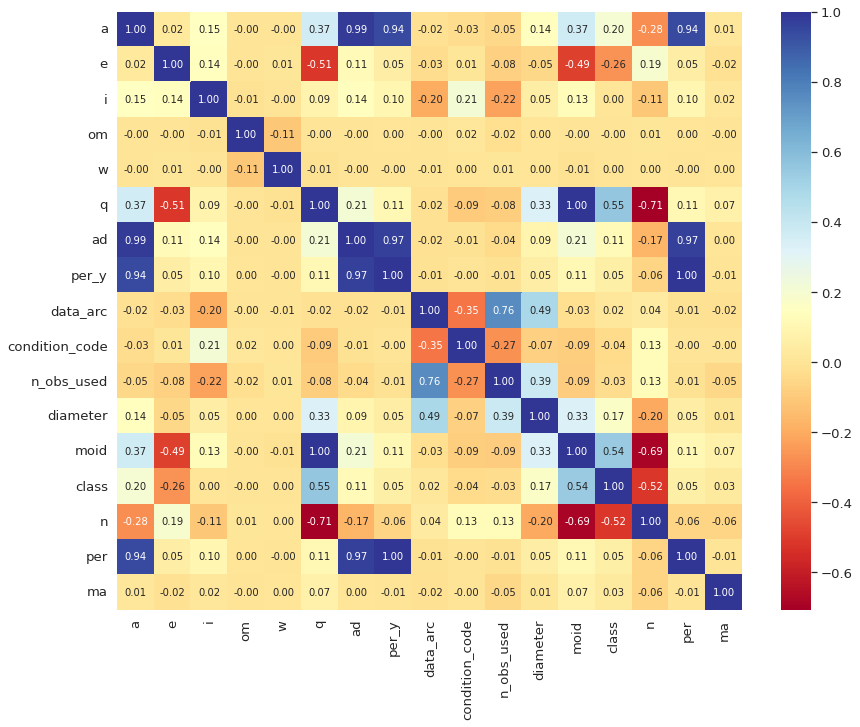

In [41]:
plt.figure(figsize=(14,11))
sns.set(font_scale=1.2)
sns.heatmap(train.corr(),annot=True, cmap='RdYlBu',fmt='.2f', annot_kws={'size':10});

Based on the above figure, it can be observed that columns a,ad and per, per_y are highly related. We try to see similarity between them using graphs and remove columns if two of them are very related.

In [42]:
#df = train[['per', 'per_y','a','ad']]
#sns.pairplot(df)

per, per_y plots have points on line y=x. Hence because of relating so much we can remove one column per, ad(very related to a).

In [43]:
train.drop('per', axis=1, inplace=True)

In [44]:
train.drop('ad',axis=1,inplace= True)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   per_y           137636 non-null  float64
 7   data_arc        137636 non-null  float64
 8   condition_code  137636 non-null  float64
 9   n_obs_used      137636 non-null  int64  
 10  diameter        137636 non-null  float64
 11  moid            137636 non-null  float64
 12  class           137636 non-null  int64  
 13  n               137636 non-null  float64
 14  ma              137636 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 20.8 MB


In [46]:
# method to plot selected columns
#dis = train[['e', 'i','om','w','q','ma']]
#dis.hist(figsize=(14,11));
#plt.show;

doubt: randomly chooses x axis values? (above plot)

## Outlier detection and compensation

We try to detect major outliers in our dataset that can significantly impact our data and treat those outliers.

om       AxesSubplot(0.125,0.772143;0.110714x0.107857)
w     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
ma    AxesSubplot(0.390714,0.772143;0.110714x0.107857)
dtype: object

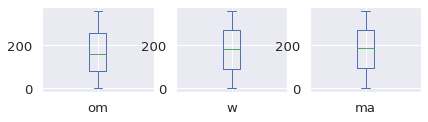

In [47]:
# to observe outliers from box plots
col1 = train [['om', 'w','ma']]
col1.plot(kind="box", subplots=True, layout=(6,6), figsize=(14,11))

We can observe no outlier for the above columns.

per_y          AxesSubplot(0.125,0.772143;0.110714x0.107857)
a           AxesSubplot(0.257857,0.772143;0.110714x0.107857)
diameter    AxesSubplot(0.390714,0.772143;0.110714x0.107857)
data_arc    AxesSubplot(0.523571,0.772143;0.110714x0.107857)
dtype: object

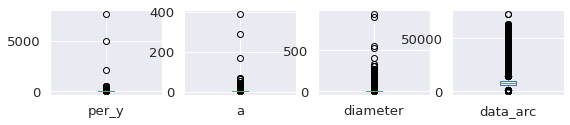

In [48]:
col2 = train[['per_y', 'a','diameter','data_arc']]
col2.plot(kind="box", subplots=True, layout=(6,6), figsize=(14,11))

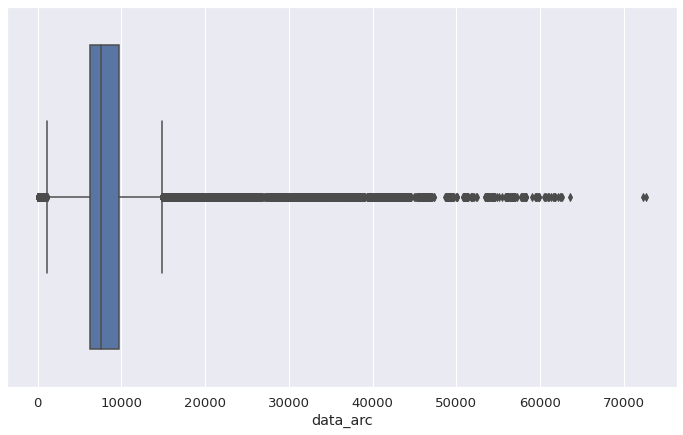

In [59]:
plt.figure(figsize=(12, 7))
sns.boxplot(train['data_arc'])


In [ ]:
upper_limit = train['data_arc'].quantile(0.97)
lower_limit = train['data_arc'].quantile(0.03)
print(upper_limit,lower_limit)

In [ ]:
train['per_y'] = np.where(train['per_y'] >= upper_limit,
        upper_limit, np.where(train['per_y'] <= lower_limit,lower_limit,train['per_y']))

We will find the upper and lower_limit for the columns that have outliers. Values of those columns lying beyond these values will be eliminated.
(Here I simply eliminate those rows with outliers since the input data is so large that ig it wouldn't matter)

In [50]:
upper_limit = train['per_y'].quantile(0.97)
lower_limit = train['per_y'].quantile(0.03)
print(upper_limit,lower_limit)

5.916512601198647 3.2791433145181497


In [51]:
train['per_y'] = np.where(train['per_y'] >= upper_limit,
        upper_limit, np.where(train['per_y'] <= lower_limit,lower_limit,train['per_y']))

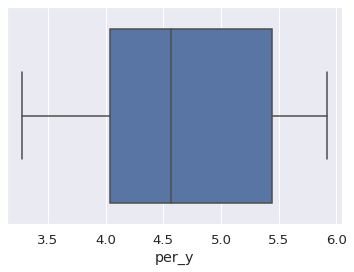

In [52]:
sns.boxplot(train['per_y'])

In [53]:
upper_limit = train['a'].quantile(0.95)
lower_limit = train['a'].quantile(0.05)
print(upper_limit,lower_limit)

3.2174673788891357 2.2456071928593744


In [54]:
train['a'] = np.where(train['a'] >= upper_limit,
        upper_limit, np.where(train['a'] <= lower_limit,lower_limit,train['a']))

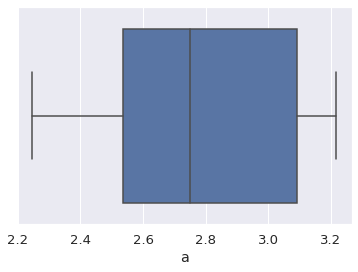

In [55]:
sns.boxplot(train['a'])

In [56]:
upper_limit = train['n'].quantile(0.97)
lower_limit = train['n'].quantile(0.03)
print(upper_limit,lower_limit)

0.3005743234841983 0.16658906180104405


In [57]:
train['n'] = np.where(train['n'] >= upper_limit,
        upper_limit, np.where(train['n'] <= lower_limit,lower_limit,train['n']))

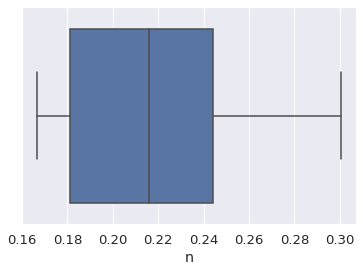

In [58]:
sns.boxplot(train['n'])

After outlier detection and finding relationship between some values, we performed data analysis.